Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

The homework sheets will usually be available on Monday and are supposed to be solved in groups of three. They have to be handed in before Monday morning of the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass $N-2$ of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See `Participants` -> `Functions/Groups`). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something. 

Your group will have a group folder in Stud.IP under `Documents`. Upload your solutions there to hand them in.

All exercise sheets will use [Jupyter Notebooks](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html). To be able to run these on your system, you will need to install Python and a few packages. We suggest you to use the latest version of Python 3. In case you are not familiar with it, follow the directives below ([Assignment 0](#install-conda)) to get it up and running. [Assignment 0b](#run-jupyter) on this sheet will provide details on how to run the notebooks with Jupyter.

This week's sheet should be solved and handed in before the end of **Sunday, November 11, 2018**. 
Please upload your results to your group's Stud.IP folder. In case you cannot do this first sheet (due to technical or organizational problems) please upload a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and you may hand in this sheet together with the second sheet one week later.

<a name="install-conda"></a>
## Assignment 0: Setup your homework environment [0 Points]

This exercise gives you no points, but it is required to do the other exercises. If you have problems, do not hesitate to contact us.

### a) Install Conda

To be able to run Jupyter Notebooks you will need Python. Follow this exercise to get everything up and running.

We recommend to use Anaconda:
* Download and install Anaconda from https://www.continuum.io/downloads that contains all important Python packages.
* If you have limited diskspace install Miniconda https://conda.io/miniconda.html instead, which contains only conda and Python.

Follow the installation instructions on the web site.

### b) Setup the `cv` environment

Download `cv.yml` from Stud.IP. Then in a terminal navigate to the directory where you saved `cv.yml` and run

```sh
conda env create -f cv.yml 
```

### c) Activate the environment 

Always activate the enviornment when you work on the homework. 

Linux/Mac OS:

```sh
source activate cv
```
    
For Windows:
```sh
activate cv
```

<a name="run-jupyter"></a>
### b) Run Jupyter Notebooks

After you installed Python and Jupyter verify you are able to run the notebook server by opening your command line, navigate to the directory where you downloaded the `sheet01.ipynb` to, e.g. `~/university/CV2018-19` or `C:\Users\Documents\University\CV2018-19` and run jupyter in that directory.

```sh
cd ~/university/CV2018-19
jupyter notebook
```

Usually a browser window should open up. If not, open your favorite webbrowser and navigate to [localhost:8888/tree](localhost:8888/tree).

You will be presented with a list of files, choose `sheet01.ipynb`: You are good to go now and can start working on your homework right away!

### c) Check your installation
Check that your installation succeeded and all required packages are available by executing the following cell (type <kbd>Ctrl</kbd>+<kbd>&#x23ce;</kbd>, on German keyboards <kbd>Strg</kbd>+<kbd>&#x23ce;</kbd>, or press the "run cell"-button at the toolbar above):

In [1]:
import importlib
assert importlib.util.find_spec('numpy') is not None , 'numpy not found'
assert importlib.util.find_spec('matplotlib') is not None, 'matplotlib not found'
assert importlib.util.find_spec('scipy') is not None , 'scipy not found'

### Remarks:

* If you experience any troubles, ask your fellow students or send us an e-mail - we are always happy to help.
* If you do not want to use Python to do the exercises, but prefer another programming language, you may ask the tutors if they are willing to support it. However, the practice sessions will focus on Python and will probably not cover other languages.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

kernel convolution is the transformation of an image, that replaces each pixel value by a weighted sum of the pixels in a defined neighborhood surrounding it. It can be described as a matrix, or __kernel__ , of a specific shape, that is slid accross the image, with the pixel that is subject to changed being at it's center. 


### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

$1) \; \textrm{Let} \; \; k \in \{\mathbf{Mat};\Re^{2m+1, 2n+1}\} \textrm{, } m,n \in \mathbb{N} \; \; \textrm{be a filter kernel. 
Convolution} \; f \; \textrm{on image} \; g \; \textrm{with} \;k \; \textrm{is defined as:}$
$$ $$

$f_{k}(g) = g*k \; \textrm{such that each pixel in the resulting pixel} \; \; g'_{x,y} = g_{xy}*k = \sum_{i \in [-m,m]} \sum_{j \in [-n,n]}k_{i+m, j+n} \cdot g_{x+i, y+j}$

$$ $$
$\textrm{For any Scalar} \, \alpha \in \Re , \; \textrm{it holds by the laws of distributivity, that}$
$$ $$

$$ \alpha \sum_{i \in [-m,m]} \sum_{j \in [-n,n]}k_{i+m, j+n} \cdot g_{x+i, y+j} \Longleftrightarrow \sum_{i \in [-m,m]} \sum_{j \in [-n,n]} \alpha g_{x+i, y+j} \cdot k_{i+m, j+n}$$

$$\Longleftrightarrow$$

$$\alpha (g_{xy}*k) = (\alpha g_{xy})*k$$

$$ $$

$\textrm{If applied to every pixel, this generalizes to} \; \; \alpha f_{k}(g) = f_{k}(\alpha g). \; \; \textrm{Therefore, convolution is linear.}$
$$ $$

$2) \; \textrm{From} \; \; f(\alpha x) = \alpha^k f(x) \; \; \textrm{with} \; \; k=1, \; \textrm{it follows, that all linear functions are homogenous. Therefore, convolution is homogenous.}$

$$ $$

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

$M*N*(2m+1)*(2n+1) \; \; \textrm{multiplations and} \; \; M*N*((2m+1)*(2n+1)-1) \; \; \textrm{additions are required.}$ 

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results.

A 2d kernel $k$ with $dim(k) = (m,n)$ is separable, if it can be decomposed into two 1d vectors $\vec{p}$ of length $m$ and $\vec{q}$ with length $n$, such that $k = \vec{p}\cdot\vec{q}^{T}$. Then, $g*k$ can be computed by appying $(g*\vec{p})*\vec{q}$. Since the complexity for multiplications of a single convolution is $MNm$ for $g*\vec{p}$ and $MNn$ for $g*\vec{q}$, a seperable kernel requires $MNm+MNn = MN(m+n)$ multiplications and analogously $MN(m-1)+MN(n-1) = MN(m+n-2)$ additions.
$$ $$

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. 
Then realize the following filters, describe their effect and possible applications.

### Image

In [2]:
from imageio import imread
from skimage import data

image = data.coins().astype(np.float32)

### a) Box filter

In [3]:
import numpy as np
from scipy.ndimage.filters import convolve

def box_kernel(shape):
    m,n = shape
    assert n != 0, "kernel must be of odd shape"
    assert m != 0, "kernel must be of odd shape"
    kernel =  np.ones((n,m), dtype=np.float32) / (m*n)
    
    return kernel
    
def box_filter(image, shape):
    
    return convolve(image, box_kernel(shape), mode="reflect")


### b) Gaussian filter

You may try different filter sizes.

In [4]:
import numpy as np
from scipy.ndimage.filters import convolve
from scipy.special import comb as nCr

def gaussian_kernel(shape):
    m,n = shape
    assert n != 0, "kernel must be of odd shape"
    assert m != 0, "kernel must be of odd shape"
    binomial_n = np.array([nCr(n-1,k) for k in range(n)])
    binomial_m = np.array([nCr(m-1,k) for k in range(m)])

    kernel = np.outer(binomial_m,binomial_n)
    kernel = kernel / kernel.sum()
    return kernel

def gaussian_filter(image, shape):
    return convolve(image, gaussian_kernel(shape), mode="reflect")

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

In [5]:
import numpy as np
from scipy.ndimage.filters import convolve

def sobel_kernel(axis="vertical"):

    def v():
        return np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])
    def h(): return np.transpose(v())
    def d1():
        return np.array([[0, -1, -2],
                        [1, 0, -1],
                        [2, 1, 0]])
    def d2(): return np.fliplr(d1())

    sobel = {"vertical": v, "horizontal": h, "diagonal_1": d1, "diagonal_2": d2}
    kernel = sobel[axis]() / 4
    
    return kernel

def sobel_filter(image, axis="vertical"):
    
    return convolve(image, sobel_kernel(axis), mode="reflect")

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) * \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$.

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.



In [6]:
import numpy as np
from scipy.ndimage.filters import convolve

def unsharp_mask(image, amount=1.5):
    unsharp_image = gaussian_filter(image, (5,5))
    result = image + (image - unsharp_image) * amount
    # clip gray values to [0,255]
    result[result > 255] = 255
    result[result < 0] = 0

    return result

### Plot function

In [7]:
from matplotlib import pyplot as plt
from functools import reduce

# plot function showing filter effect
def plot_filtered(image, filter="gaussian", args=None):

    assert args != None

    mode = {"box": box_filter, "gaussian": gaussian_filter, "sobel": sobel_filter, "unsharp_mask": unsharp_mask}

    #returns shape of subplot-grid
    def plot_shape(n):
        if not n%2 == 0:
            n += 1
        list_ = reduce(list.__add__, ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0))
        list_.sort()
        a = list_[(len(list_) - 1)//2]
        b = n//a
        return a,b

    image_count = len(args)+1
    n,m = plot_shape(image_count)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(n,m,1)
    ax.title.set_text("original")
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.axis('off')
    for i, arg in enumerate(args):
        filtered_image = mode[filter](image, arg)
        ax = fig.add_subplot(n,m,i+2)
        ax.title.set_text("{}".format(arg))
        plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
        plt.axis('off')
    plt.show()

# Results

### Box filter

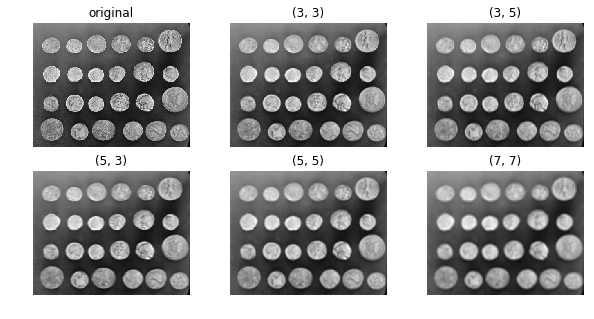

In [8]:
kernel_sizes = [(3,3), (3,5), (5,3), (5,5), (7,7)]
plot_filtered(image, "box", kernel_sizes)

### Gaussian filter

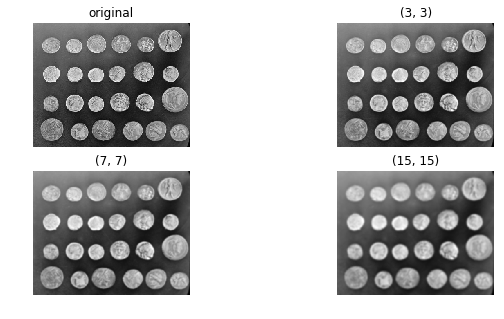

In [9]:
kernel_sizes = [(3,3), (7,7), (15,15)]
plot_filtered(image, "gaussian", kernel_sizes)

### Sobel filter

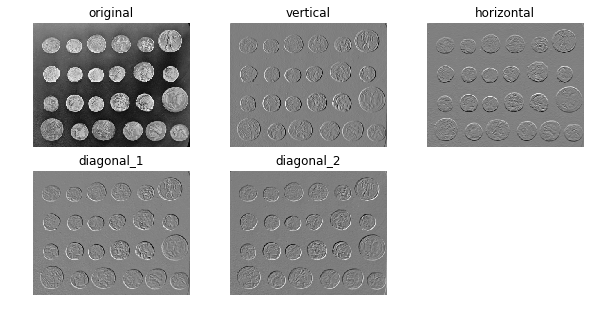

In [10]:
args = ["vertical", "horizontal", "diagonal_1", "diagonal_2"]
plot_filtered(image, "sobel", args)

### Unsharp mask

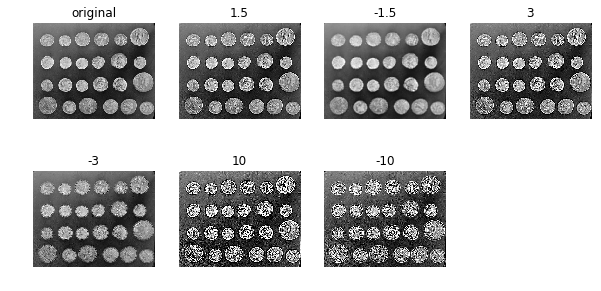

In [11]:
amounts = [1.5, -1.5, 3, -3, 10, -10]
plot_filtered(image, filter="unsharp_mask", args=amounts)

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

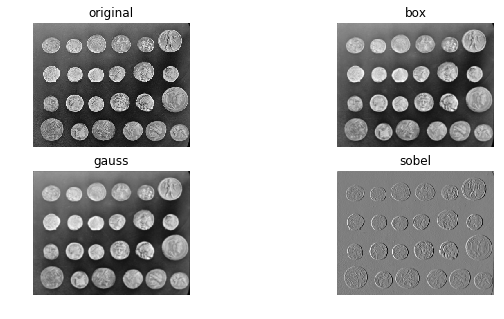

In [12]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from skimage import data

def my_convolve2d(img, kern, mode="reflect", **kwargs):
    """Convolve an image with a kernel.

    img -- the image, provided as a two-dimensional array
    kern -- the kernel, also a two-dimensional array
    """

    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)

    # Initialize the result matrix
    result = np.zeros((M,N))
    #pad
    padded = np.pad(img, ((mh,mh),(nh,nh)), mode, **kwargs)
    flat_flipped_kern = np.flip(kern, (0,1)).flatten()
    # Compute the convolution
    for i in range(M):
        for j in range(N):
            region = padded[i:i+m, j:j+n]
            result[i,j] = np.inner(region.flatten(), flat_flipped_kern)
    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = data.coins().astype(np.float32)

box_3 = box_kernel((3,3))
gauss_5 = gaussian_kernel((5,5))
sobel_v = sobel_kernel("vertical")

kernels = {"box": box_3, "gauss": gauss_5, "sobel": sobel_v}

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,2,1)
ax.title.set_text("original")
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.axis('off')

for i, entry in enumerate(kernels.items()):
    key, kern = entry 
    filtered_image = my_convolve2d(image, kern, mode="constant", constant_values=0)
    ax = fig.add_subplot(2,2,i+2)
    ax.title.set_text(key)
    plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
    plt.axis('off')
plt.show()